# Welcome to Day 2
For later... https://bit.ly/2MEcpYM

# More Time Series Analysis

In [1]:
import pandas as pd

## Interpolation

In [46]:
rain = pd.read_csv("D:/Data/Rainfall/10010.csv", names=["Date", "Rain"], index_col="Date", parse_dates=["Date"])

In [47]:
weekly = rain.asfreq("W")

In [48]:
rain['weekly'] = weekly

In [8]:
rain.loc["2000"]

,Rain,weekly
Date,,
2000-01-01,179.514368,NaN
2000-02-01,130.529529,NaN
2000-03-01,235.893511,NaN
2000-04-01,298.959012,NaN
2000-05-01,282.654166,NaN
2000-06-01,204.684638,NaN
2000-07-01,161.817207,NaN
2000-08-01,133.597649,NaN
2000-09-01,112.913940,NaN


In [49]:
rain['filled'] = rain['weekly'].interpolate() # Easy to interpolate, but make sure the data is in order, and that the even is something relatively consistent

In [51]:
%matplotlib inline

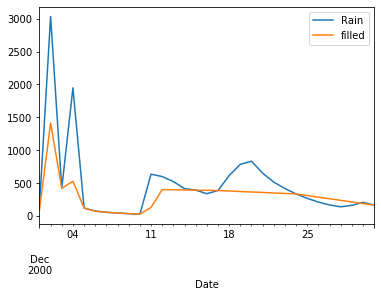

In [54]:
rain.loc["2000-12", ["Rain", "filled"]].plot(kind='line')

In [52]:
ts = pd.read_hdf("D:/Data/AAPL.h5")

In [55]:
ts.index

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2012-12-05', '2012-12-06', '2012-12-07', '2012-12-10',
               '2012-12-11', '2012-12-12', '2012-12-13', '2012-12-14',
               '2012-12-17', '2012-12-18'],
              dtype='datetime64[ns]', name='Date', length=3261, freq=None)

In [57]:
ts.describe() # executive summary, gives very general stats on the columns

,Open,High,Low,Close,Volume,Adj Close
count,3261.000000,3261.000000,3261.000000,3261.000000,3.261000e+03,3261.000000
mean,145.656900,147.435354,143.595624,145.569473,2.149814e+07,136.633554
std,160.485021,161.767461,158.765382,160.317263,1.485484e+07,163.856865
min,12.990000,13.190000,12.720000,13.120000,1.405000e+06,6.500000
25%,24.540000,25.040000,24.070000,24.670000,1.156680e+07,12.230000
50%,85.160000,86.380000,83.940000,85.210000,1.724560e+07,70.750000
75%,190.120000,192.000000,187.820000,189.950000,2.749240e+07,188.280000
max,702.410000,705.070000,699.570000,702.100000,2.650690e+08,698.910000


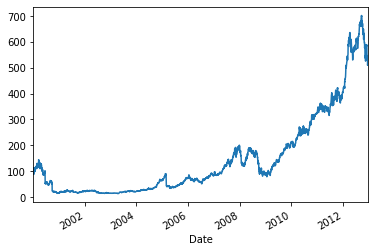

In [59]:
ts['Close'].plot()

In [60]:
ts.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,104.87,112.50,101.69,111.94,19144400,27.74
2000-01-04,108.25,110.62,101.19,102.50,18310000,25.40
2000-01-05,103.75,110.56,103.00,104.00,27818000,25.77
2000-01-06,106.12,107.00,95.00,95.00,27443200,23.54
2000-01-07,96.50,101.00,95.50,99.50,16463200,24.66


In [62]:
ts.resample("Y")['Volume'].sum() # total volume of each year since 2000

Date
2000-12-31     4298582600
2001-12-31     3380921000
2002-12-31     2750497400
2003-12-31     2543937600
2004-12-31     4350059600
2005-12-31     6514321000
2006-12-31     7703477400
2007-12-31     8820760200
2008-12-31    10213471500
2009-12-31     5116040000
2010-12-31     5393747400
2011-12-31     4430740100
2012-12-31     4588894400
Freq: A-DEC, Name: Volume, dtype: int64

In [68]:
ts['Difference'] = ts['Close'] - ts['Open']
ts.loc['2005':'2010']['Difference'].idxmax() # date with max difference between 2005 and 2010

Timestamp('2008-07-22 00:00:00')

In [98]:
ts.asfreq("A")['Adj Close'].diff().dropna()  # diff() is difference between current value and shifted value, where shift() keeps index in place, but moves data down one, pst_change() is change as percentage 

Date
2002-12-31     -3.75
2003-12-31      3.49
2004-12-31     21.33
2008-12-31   -111.74
2009-12-31    124.28
2010-12-31    110.84
Name: Adj Close, dtype: float64

# Interactive visualisation with Altair

matplotlib was for matlab users who wanted to move to python 

In [ ]:
!pip install altair vega

In [ ]:
!pip install --proxy